<a href="https://colab.research.google.com/github/lunatloyolla/olist-geographic-customer-analysis/blob/main/An%C3%A1lise_da_distribui%C3%A7%C3%A3o_de_clientes_da_Olist_por_cidade_e_estado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da distribuição de clientes da Olist por cidade e estado

Este projeto é uma analise exploratória geográfica

Principais perguntas:
* Em quais estados a Olist tem mais clientes?
* Quais cidades concentram mais clientes?
* A base de clientes é muito concentrada em poucas cidades ou bem distribuída?



In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

# Estrutura dos dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

URL = '/content/drive/MyDrive/Portifolio/DatasetsPortifolio/olist_customers_dataset.csv'
df = pd.read_csv(URL, sep=',')

Mounted at /content/drive


In [ ]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
df["customer_id"].nunique()

99441

# Em quais estados a Olist tem mais clientes?

In [ ]:
clientes_por_estado = df["customer_state"].value_counts().reset_index()
clientes_por_estado.columns = ["state", "num_customers"]
clientes_por_estado

,state,num_customers
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [ ]:
top_estados = clientes_por_estado.head(10)

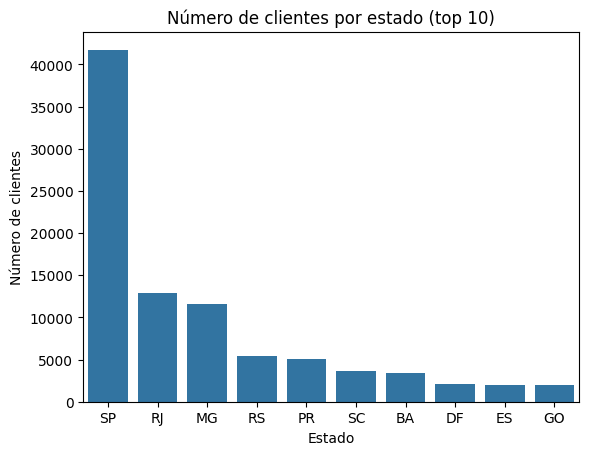

In [ ]:
sns.barplot(data=top_estados, x="state", y="num_customers")
plt.title("Número de clientes por estado (top 10)")
plt.xlabel("Estado")
plt.ylabel("Número de clientes")
plt.show()

In [ ]:
clientes_por_cidade = df["customer_city"].value_counts().reset_index()
clientes_por_cidade.columns = ["city", "num_customers"]
clientes_por_cidade.head(10)

,city,num_customers
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


# Quais cidades concentram mais clientes?

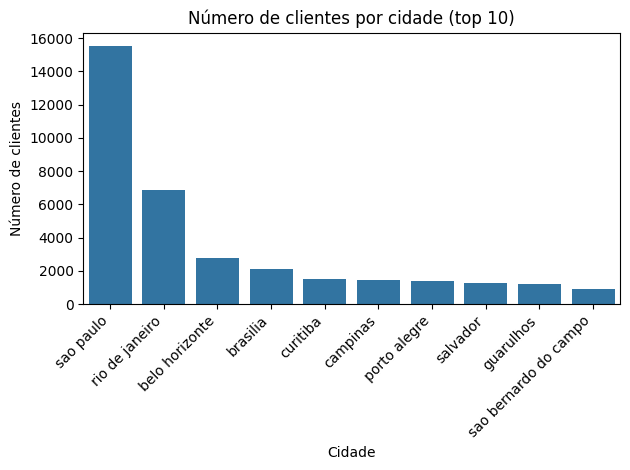

In [ ]:
top_cidades = clientes_por_cidade.head(10)

sns.barplot(data=top_cidades, x="city", y="num_customers")
plt.title("Número de clientes por cidade (top 10)")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Cidade")
plt.ylabel("Número de clientes")
plt.tight_layout()
plt.show()

# A base de clientes é muito concentrada em poucas cidades ou bem distribuída?

O maior número de clientes está concentrada na região sudesde do brasil, principalmente nos estados de São Paulo e Rio de Janeiro. Dessa forma, visando aumentar o número de clientes a empresa poderia expandir suas estratégias de marketing e abrangência para outros estados brasileiros.
